In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from keras.datasets import fashion_mnist

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Text(0.5, 1.0, '8')

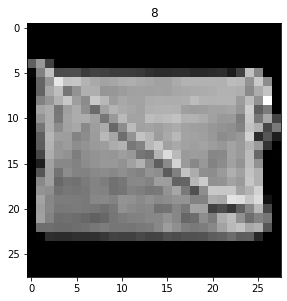

In [23]:
plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(X_train[15500, :, :], cmap='gray')
plt.title(y_train[15500])

In [24]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [25]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [26]:
X_train.astype('float32')
X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255

In [28]:
from keras.utils import to_categorical

In [29]:
y_train_enc = to_categorical(y_train)
y_test_enc = to_categorical(y_test)

In [32]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(X_train, y_train_enc, test_size=0.2, random_state=13)

In [33]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [40]:
import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.models import Model

In [41]:
batch_size=64
epochs=5
num_classes=10

In [46]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same', input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [47]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [48]:
fashion_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

In [49]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/5
750/750 [==============================] - 81s 106ms/step - loss: 0.6040 - accuracy: 0.7750 - val_loss: 0.3721 - val_accuracy: 0.8666
Epoch 2/5
750/750 [==============================] - 73s 98ms/step - loss: 0.3740 - accuracy: 0.8633 - val_loss: 0.2996 - val_accuracy: 0.8892
Epoch 3/5
750/750 [==============================] - 74s 99ms/step - loss: 0.3251 - accuracy: 0.8799 - val_loss: 0.2861 - val_accuracy: 0.8921
Epoch 4/5
750/750 [==============================] - 70s 93ms/step - loss: 0.2985 - accuracy: 0.8886 - val_loss: 0.2635 - val_accuracy: 0.9023
Epoch 5/5
750/750 [==============================] - 65s 87ms/step - loss: 0.2832 - accuracy: 0.8936 - val_loss: 0.2456 - val_accuracy: 0.9076


In [51]:
test_eval = fashion_model.evaluate(X_test, y_test_enc, verbose=1)

313/313 [==============================] - 7s 21ms/step - loss: 0.2618 - accuracy: 0.9040


In [52]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.26182278990745544
Test accuracy: 0.9039999842643738


In [55]:
predicted_classes = fashion_model.predict(X_test)

313/313 [==============================] - 4s 13ms/step


In [56]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [60]:
predicted_classes.shape, y_test.shape

((10000,), (10000,))

Found 8958 correct labels


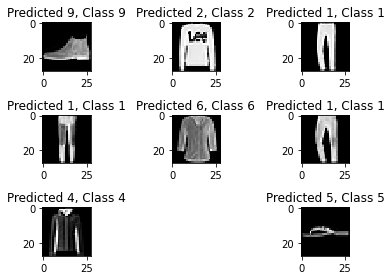

In [63]:
correct = np.where(predicted_classes==y_test)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

Found 1042 incorrect labels


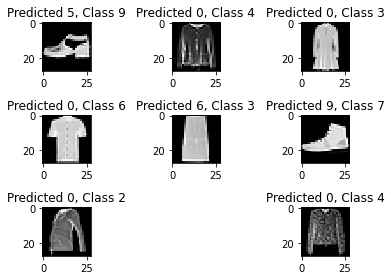

In [64]:
incorrect = np.where(predicted_classes!=y_test)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

In [65]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.70      0.88      0.78      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.87      0.84      0.85      1000
     Class 3       0.92      0.87      0.90      1000
     Class 4       0.85      0.84      0.84      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.77      0.68      0.72      1000
     Class 7       0.95      0.96      0.96      1000
     Class 8       0.99      0.97      0.98      1000
     Class 9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

